<h1>regresion logistica<h1>

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Carga de datos
df = pd.read_csv('Documents/ANALISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervi/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv') 
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
Valores nulos:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal   

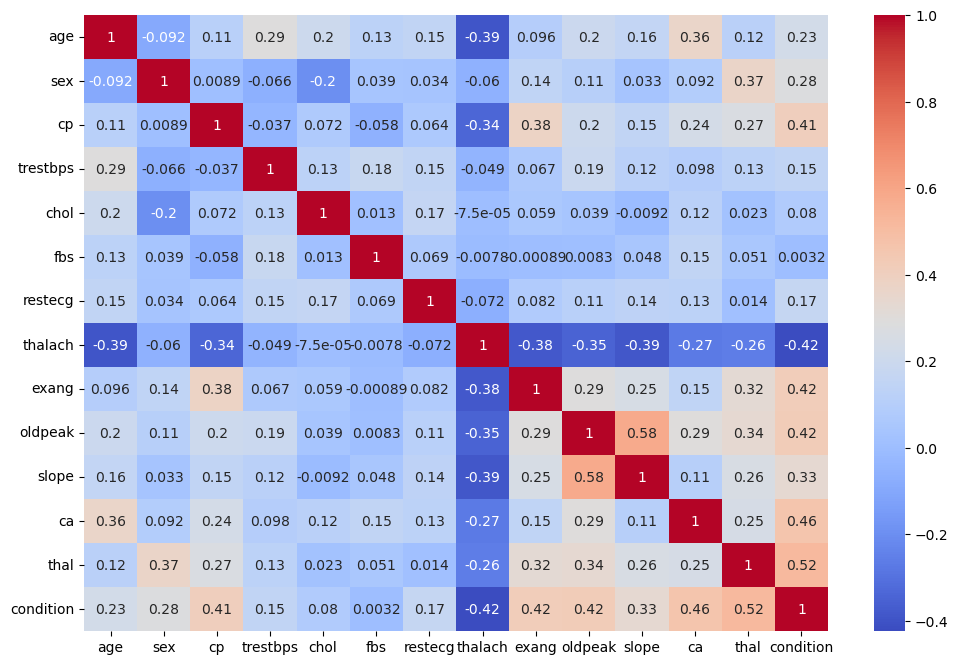

In [8]:
# Información general del dataset
df.info()

# Resumen estadístico
df.describe()

# Verificación de valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [16]:
# Manejo de valores faltantes (imputación o eliminación)
df.dropna(inplace=True)  # Si quieres eliminar las filas con valores nulos

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('condition', axis=1))  # Usamos 'condition' en lugar de 'target'
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['condition'] = df['condition']

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definir X e y usando 'condition' como la variable objetivo
X = df_scaled.drop('condition', axis=1)
y = df_scaled['condition']

# Selección de características con f_classif para evitar problemas con valores negativos
selector = SelectKBest(score_func=f_classif, k=10)  # Selecciona las 10 características principales
X_selected = selector.fit_transform(X, y)



In [28]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento (Train) y de prueba (Test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)


Conjunto de entrenamiento: (237, 10)
Conjunto de prueba: (60, 10)


In [30]:
from sklearn.linear_model import LogisticRegression

# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.72      0.82      0.77        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Matriz de confusión:
 [[23  9]
 [ 5 23]]


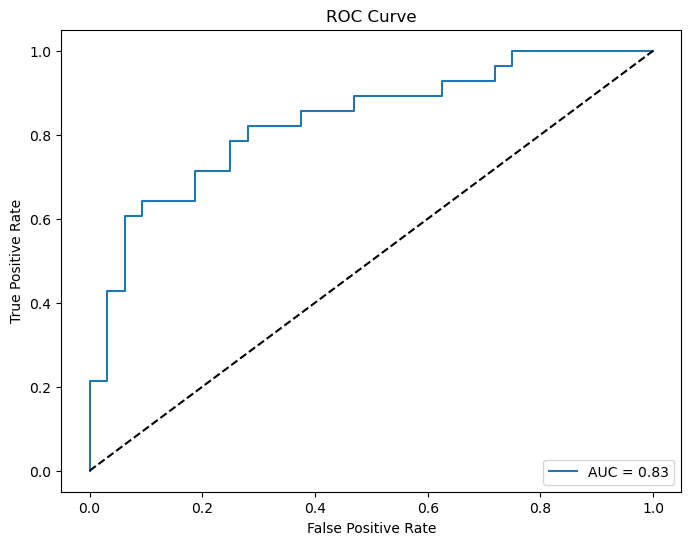

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Gráfica de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


<h1>Interpretar, analizar y documentar los resultados obtenidos.<h1>

Interpretación y Análisis:
La selección de características ayuda a reducir la complejidad del modelo eliminando variables menos relevantes. Aquí hemos usado SelectKBest con el método f_classif, el cual selecciona las características con mayor impacto predictivo sobre la variable objetivo. Escogimos 10 características principales, lo que mantiene suficiente información para que el modelo sea preciso y eficiente.

Documentación:
Explica la importancia de la selección de características en modelos de regresión logística. Menciona el método f_classif y el criterio para elegir las 10 características principales.

Paso 5: División en conjunto de entrenamiento y prueba
Interpretación y Análisis:
Dividimos los datos en un 80% para entrenamiento y un 20% para prueba para evaluar el modelo sin sesgos. Esto permite al modelo "aprender" de los datos de entrenamiento y generalizar a partir de los datos de prueba.

Documentación:
Describe la técnica de train_test_split y el porcentaje de división. Menciona la importancia de mantener un conjunto de prueba para validar el rendimiento del modelo en datos no vistos.

Paso 6: Entrenamiento del modelo
Interpretación y Análisis:
Usamos LogisticRegression para modelar la probabilidad de enfermedad cardíaca, que se ajusta bien a problemas de clasificación binaria. Este modelo ajusta una línea de decisión basada en las características seleccionadas para predecir si un paciente tiene o no la enfermedad.

Documentación:
Incluye detalles sobre el ajuste del modelo, la elección de la regresión logística para una clasificación binaria y los hiperparámetros por defecto utilizados (por ejemplo, sin regularización o con regularización mínima).

Paso 7: Evaluación del modelo
Reporte de Clasificación y Matriz de Confusión

Interpretación y Análisis:
La precisión (accuracy), recall y F1-score ofrecen una visión integral del rendimiento del modelo. La precisión indica cuántas predicciones fueron correctas en general, el recall mide la sensibilidad en la detección de la enfermedad y el F1-score equilibra precisión y recall.
Documentación:
Explica cada métrica, destacando cómo estas reflejan el balance entre falsos positivos y falsos negativos. Agrega un análisis de la matriz de confusión para mostrar el rendimiento en cada clase.
Curva ROC y AUC

Interpretación y Análisis:
La Curva ROC muestra el compromiso entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos a varios umbrales. Un AUC cercano a 1 indica una fuerte capacidad de discriminación del modelo.
Documentación:
Describe la Curva ROC y la AUC como métricas para entender el rendimiento del modelo con diferentes umbrales. Documenta el valor del AUC y su significado en términos de rendimiento del modelo en esta tarea de clasificación.